In [5]:
#Importing 
import math
import time
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import pearsonr  
from numpy import absolute, mean, std, sqrt
from sklearn import preprocessing
from sklearn.cluster import KMeans

#Importing Data
pwd=os.getcwd()
filepath=pwd+"/data.csv"
data = np.loadtxt(filepath)

#shuffle the data 
np.random.seed(100)
np.random.shuffle(data)

#remove features
#data is equal to everything but features (stored in row 0)
data2 = data[:,1:257]
print(data2.shape)

(7291, 256)


<h2>k-means</h2>

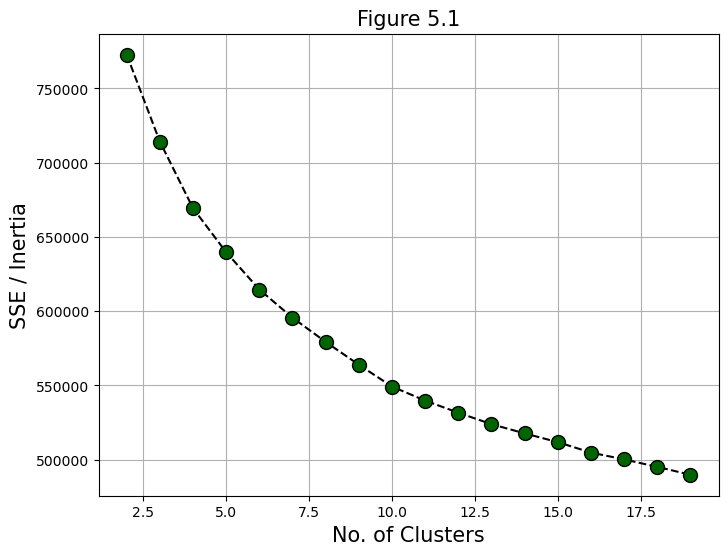

In [6]:
#a)
np.random.seed(100)
inertia_values = []
for i in range(2, 20, 1):
    k_means = KMeans(init="random", n_clusters=i)
    k_means.fit_predict(data2)
    inertia_values.append(k_means.inertia_)
#plot graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,20,1), inertia_values, color='black', linestyle='dashed', marker='o',
         markerfacecolor='darkgreen', markersize=10)
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('Figure 5.1', fontsize=15)
plt.grid()
plt.show()

b) Given the nature of our data having 10 different categories, we would expect 10
clusters to be reasonable. Judging by where the ”elbow” of the plot is, it appears
10 clusters is reasonable.

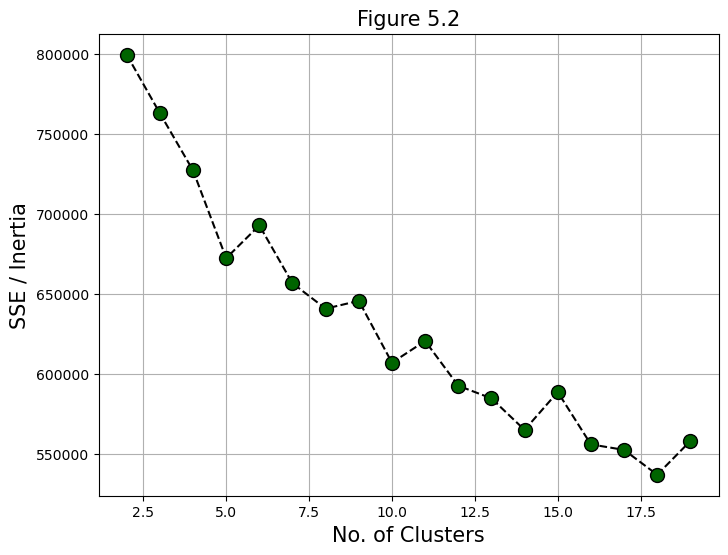

In [7]:
#c)
np.random.seed(100)
inertia_values = []
for i in range(2, 20, 1):
    k_means = KMeans(init="random",n_init=1,max_iter=1, n_clusters=i)
    k_means.fit_predict(data2)
    inertia_values.append(k_means.inertia_)
#plot graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,20,1), inertia_values, color='black', linestyle='dashed', marker='o',
         markerfacecolor='darkgreen', markersize=10)
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('Figure 5.2', fontsize=15)
plt.grid()
plt.show()

d) Figure 5.1 is decreasing, whereas figure 5.2 isn’t. A main difference causing this may be the fact that in Figure 5.2, we set the maximum number of iterations to 1 (whereas the default in 5.1 is 300), and number of iterations to 1(whereas the default in 5.1 is 10). Imposing these restrictions on Figure 5.2 does 2 main things: 1) the maximum number of iterations being such a low number does not guarantee convergence, and 2) the number of iterations being so low also means that the algorithm will only test out 1 centroid, as opposed to 10. These restrictions will cause the inertia to jump around, because we only test 1 centroid, and only have 1 attempt for convergence to be met, whereas in figure 5.1, the algorithm run many times and was able to choose the best centroids lowering inertia, and had a higher chance of convergence because the maximum number of iterations is higher.

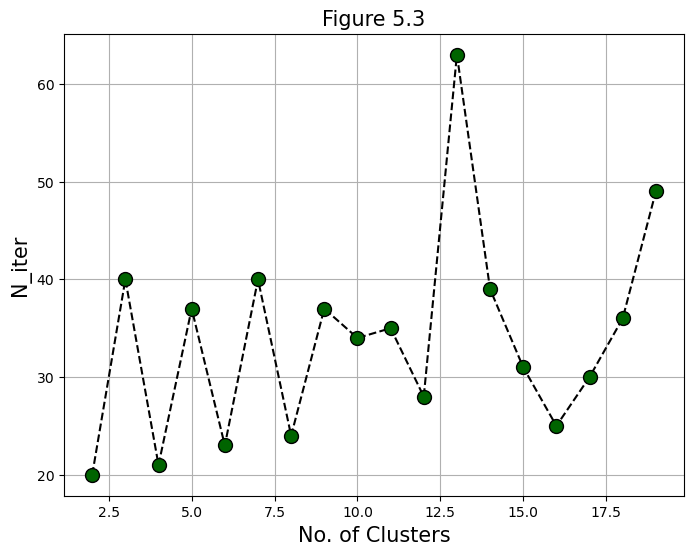

In [8]:
#e)
n_iter = []
for i in range(2, 20, 1):
    k_means = KMeans(init="random", n_clusters=i)
    k_means.fit_predict(data2)
    n_iter.append(k_means.n_iter_)
#plot graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,20,1), n_iter, color='black', linestyle='dashed', marker='o',
         markerfacecolor='darkgreen', markersize=10)
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('N_iter', fontsize=15)
plt.title('Figure 5.3', fontsize=15)
plt.grid()
plt.show()

f) With more clusters, we’d expect the number of iterations to need to be higher,otherwise inertia will likely be higher; i.e. if we have more clusters in our data, we would expect to need do test out more centroids (number of iterations) in order to get lower inertia/more accurate estimates, due to the fact that there are more clusters spread around, so in order to accurately capture their centers, we should test more centroids. Judging by figure 5.3, although there appears to be a lot of variation, it seems as though the farther away from 10 clusters we get, the higher the number of iterations.

g) Here we can see that our original two features, mean intensity and correlation coefficient, are not particularly good at separating all of the data, since we can see that there is no clear separation of the data until after we run it through
kmeans. However, this is somewhat expected since we are effectively trying to describe 10 different numbers (256 features) with only 2 features.

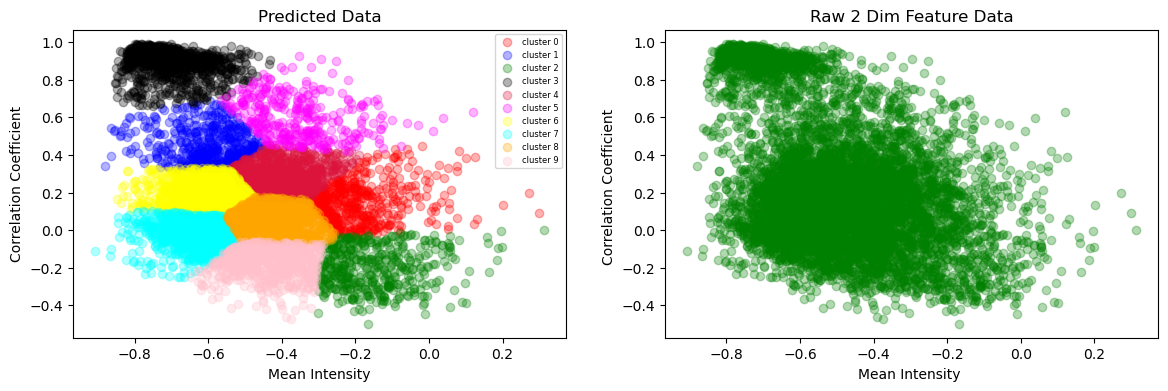

In [10]:
#h)
np.random.seed(100)
#function for splitting lists directly in half
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

#2 Dim Data
X = []
Y = []
simpleTrain = [] 
for index in range(len(data2)):
    B,C = split_list(data2[index])
    featuresC = pearsonr(B,C)
    X.append(np.mean(data2[index])) 
    Y.append(featuresC[0])
    simpleTrain.append([np.mean(data2[index]),featuresC[0]]) 

#Build Model
simpleTrain = np.array(simpleTrain)
k_means = KMeans(init='random',n_clusters=10)
#Predict the labels of clusters.
label = k_means.fit_predict(simpleTrain)

#Plot the Graph
fig, (k_means_ax,raw_ax) = plt.subplots(ncols=2, figsize=(14, 4))
raw_ax.scatter(X, Y, c='green' ,alpha=0.3)
raw_ax.set_title('Raw 2 Dim Feature Data')
raw_ax.set_xlabel('Mean Intensity ')
raw_ax.set_ylabel('Correlation Coefficient ')
colors=['red','blue','green','black','crimson','magenta','yellow','cyan','orange','pink']
for n,x in zip(range(0,10,1),colors):
    k_means_ax.scatter(simpleTrain[label == n][:,0] ,simpleTrain[label == n][:,1],c=x ,alpha=0.3,label='cluster %s' %n)
k_means_ax.set_title('Predicted Data')
k_means_ax.legend(prop={'size': 6})
k_means_ax.set_xlabel('Mean Intensity')
k_means_ax.set_ylabel('Correlation Coefficient')
plt.show()